In [14]:
import io
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
Data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Sex is Object datatype . so we will need Encoding to change this to float

In [7]:
Data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No missing values found in the dataset

In [8]:
Data.head(25)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


# Converting Object to Numeric using Label encoder 

In [20]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in Data.columns:
    if Data[i].dtypes=="object":
        Data[i]=enc.fit_transform(Data[i].values.reshape(-1,1))
Data

C:\Users\Pradeep\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [21]:
Data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

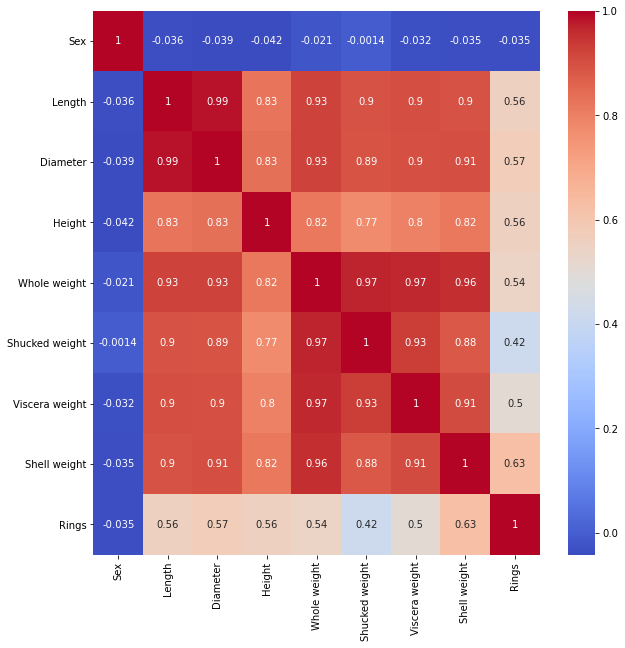

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(),cmap="coolwarm",annot=True)

Sex is negatively correlated to  Rings(Target Value). so we can drop the same as there wil be no impact on the prediction 

In [26]:
Data1=Data.drop("Sex",axis=1)

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length', ylabel='Density'>

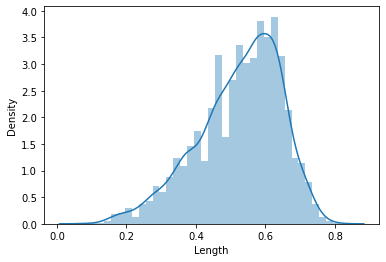

In [27]:
sns.distplot(Data["Length"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diameter', ylabel='Density'>

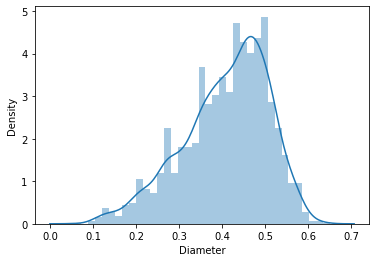

In [28]:
sns.distplot(Data["Diameter"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

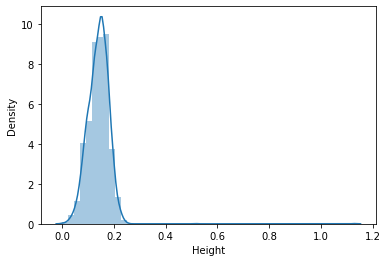

In [29]:
sns.distplot(Data["Height"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

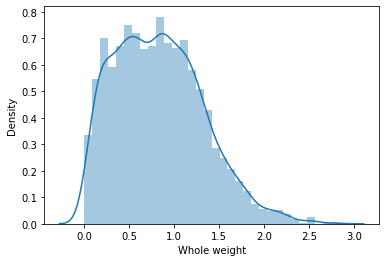

In [30]:
sns.distplot(Data["Whole weight"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

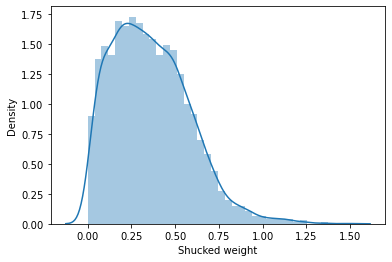

In [31]:
sns.distplot(Data["Shucked weight"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

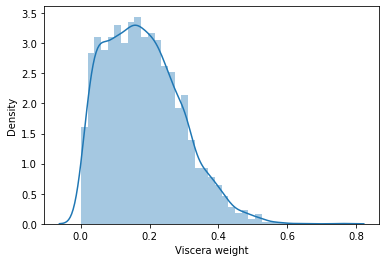

In [32]:
sns.distplot(Data["Viscera weight"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

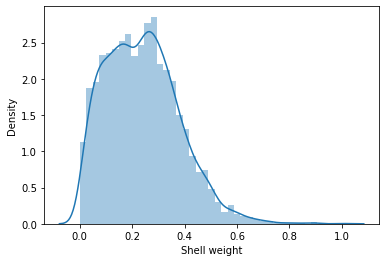

In [36]:
sns.distplot(Data1["Shell weight"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rings', ylabel='Density'>

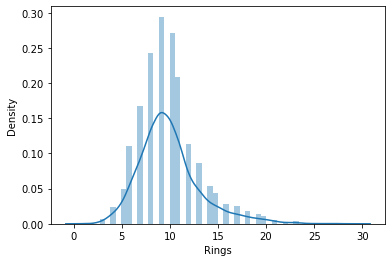

In [35]:
sns.distplot(Data1["Rings"])

# Whole weight,Shucked weight, Viscera weight and shell weight are not normally distributed. They are skewed and the skewness needs to be treated

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Pradeep\anaconda

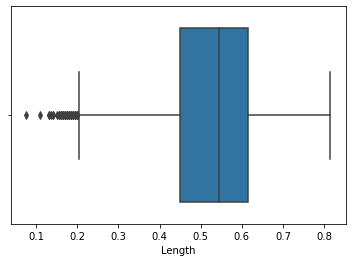

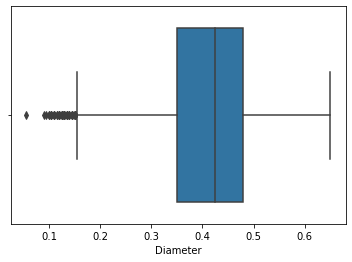

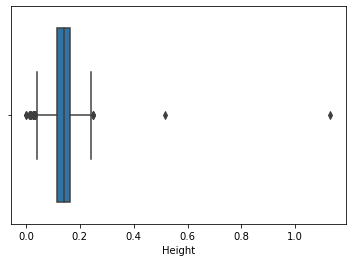

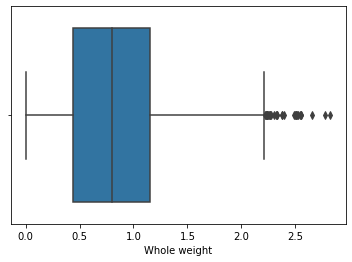

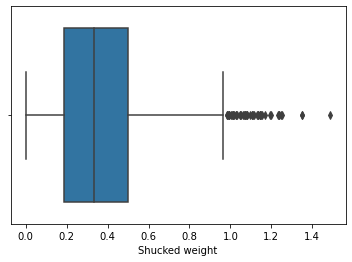

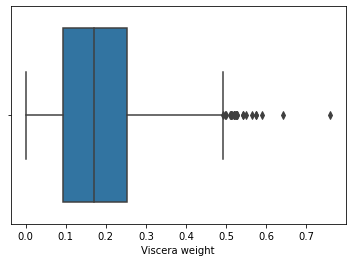

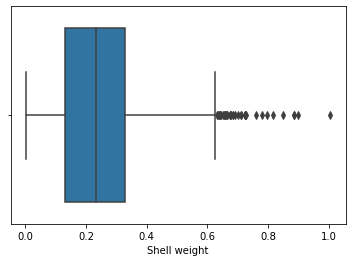

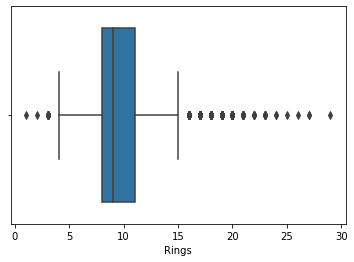

In [38]:
for i in Data1:
    plt.figure()
    sns.boxplot(Data1[i])

There are outliers in all the columns and needs to be treated using Zscore.

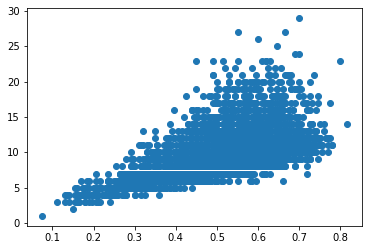

In [40]:
plt.scatter(Data1["Length"],Data1["Rings"])

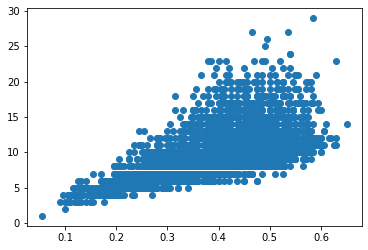

In [41]:
plt.scatter(Data1["Diameter"],Data1["Rings"])

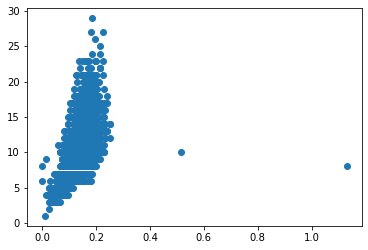

In [42]:
plt.scatter(Data1["Height"],Data1["Rings"])

# including Age column as Age is Rings+1.5 years

In [43]:
Data1["Age"]=Data1["Rings"]+1.5

In [44]:
Data1

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


# Outliers Treatment

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(Data1))
z.shape

(4177, 9)

In [49]:
pd.DataFrame(z).head(50)

,0,1,2,3,4,5,6,7,8
0,0.574558,0.432149,1.064424,0.641898,0.607685,0.726212,0.638217,1.571544,1.571544
1,1.448986,1.439929,1.183978,1.230277,1.170910,1.205221,1.212987,0.910013,0.910013
2,0.050033,0.122130,0.107991,0.309469,0.463500,0.356690,0.207139,0.289624,0.289624
3,0.699476,0.432149,0.347099,0.637819,0.648238,0.607600,0.602294,0.020571,0.020571
4,1.615544,1.540707,1.423087,1.272086,1.215968,1.287337,1.320757,0.910013,0.910013
5,0.824395,1.087206,1.064424,0.973307,0.983919,0.940625,0.853756,0.599818,0.599818
6,0.050033,0.071741,0.250672,0.104505,0.551363,0.356690,0.655017,3.122516,3.122516
7,0.174951,0.172519,0.347099,0.123880,0.294533,0.283698,0.152092,1.881738,1.881738
8,0.408000,0.381760,0.347099,0.651076,0.643732,0.621286,0.530447,0.289624,0.289624
9,0.216591,0.323686,0.250672,0.134109,0.202164,0.270012,0.583170,2.812322,2.812322


In [50]:
Data_New=Data1[(z<3).all(axis=1)]
Data_New

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [52]:
Data_loss=((4177-4027)/4177)*100
Data_loss

3.5910940866650707

Data loss is 3% so we can proceed with new data set

In [53]:
Data_New.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.725464
dtype: float64

# Splitting Data into X and Y

In [54]:
x=Data_New.iloc[:,:-2]
y=Data_New.iloc[:,-1]

# Removing Skewness

In [55]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Scaling Data

In [57]:
from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x=S.fit_transform(x)
x

array([[-0.68445079, -0.54337947, -1.15893308, ..., -0.54086524,
        -0.68803217, -0.58635376],
       [-1.4117394 , -1.40113174, -1.28040611, ..., -1.31131805,
        -1.33285416, -1.33271691],
       [-0.0462191 ,  0.03716259, -0.12830502, ..., -0.36270513,
        -0.24037305, -0.08021413],
       ...,
       [ 0.65112915,  0.70592133,  1.94363286, ...,  0.90189694,
         1.08965131,  0.66363183],
       [ 0.92606411,  0.8377131 ,  0.28606972, ...,  0.92415296,
         0.87642835,  0.57752029],
       [ 1.9719402 ,  1.85550496,  1.62558351, ...,  2.31446634,
         1.73214622,  1.85675543]])

# Linear Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [106]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1,the training accuracy is:- 0.5179011842814742
At random state 1,the testing accuracy is:- 0.4867041568800342


At random state 2,the training accuracy is:- 0.5139840617179328
At random state 2,the testing accuracy is:- 0.505500840508265


At random state 3,the training accuracy is:- 0.5135551691686369
At random state 3,the testing accuracy is:- 0.50649035224791


At random state 4,the training accuracy is:- 0.5110098284810829
At random state 4,the testing accuracy is:- 0.5169136142613011


At random state 5,the training accuracy is:- 0.5173884156414115
At random state 5,the testing accuracy is:- 0.49133735518861776


At random state 6,the training accuracy is:- 0.5104395554810361
At random state 6,the testing accuracy is:- 0.5185254378480804


At random state 7,the training accuracy is:- 0.5211341508979477
At random state 7,the testing accuracy is:- 0.4756517473862033


At random state 8,the training accuracy is:- 0.510278294449096
At random state 8,the testing accura

In [63]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=88,test_size=0.20)

In [66]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
print("\n")

At random state 99,the training accuracy is:- 0.512122895438827
At random state 99,the testing accuracy is:- 0.5125744332470124




In [68]:
lr_predict=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=r2_score(y_test,lr_predict)
for j in range(2,10):
    lssscore=cross_val_score(lr,x,y,cv=j)
    lsc=lssscore.mean()
    print("cv:",j)
    print("cross validation score is",lsc*100)
    print("Accuracy_score :",lss*100)

cv: 2
cross validation score is 50.90307146974536
Accuracy_score : 51.257443324701235
cv: 3
cross validation score is 49.756140222442454
Accuracy_score : 51.257443324701235
cv: 4
cross validation score is 43.245535580810866
Accuracy_score : 51.257443324701235
cv: 5
cross validation score is 42.35147420414229
Accuracy_score : 51.257443324701235
cv: 6
cross validation score is 43.329251155229834
Accuracy_score : 51.257443324701235
cv: 7
cross validation score is 44.43338018201989
Accuracy_score : 51.257443324701235
cv: 8
cross validation score is 40.96401262415611
Accuracy_score : 51.257443324701235
cv: 9
cross validation score is 43.07455108083102
Accuracy_score : 51.257443324701235


# Lasso

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [95]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
Las= Lasso()
FitParameters= GridSearchCV(Las,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [96]:
Las = Lasso(alpha=0.001,random_state=0)
Las.fit(x_train,y_train)
Las.score(x_train,y_train)
pred_lasso = Las.predict(x_test)

Lasso = r2_score(y_test,pred_lasso)
Lasso

cvscore=cross_val_score(Las,x,y,cv=3)
cvmean=cvscore.mean()
cvmean

0.49742868228237364

# Random  Forest  Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(x_train,y_train)

print(FitParameters.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [118]:
rf= RandomForestRegressor(criterion="mse",max_features="log2")
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x_train,y_train,cv=2)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 54.622088726985886
Cross Val Score: 53.15328588169478


# Decision Tree Regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random'],'max_features':["auto","sqrt","log2"]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'max_features': 'log2', 'splitter': 'best'}


In [114]:
DTR = DecisionTreeRegressor(criterion='friedman_mse', splitter='best',max_features='log2')
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
pred_decision = DTR.predict(x_test)

dts = r2_score(y_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(DTR,x_train,y_train,cv=2
                         
                         
                         
                         )
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 3.4094482054878306
Cross Val Score: 8.857445305637407


Based on the accuracy and CV score we conclude that Random Forest is the best fit model for this data set

In [115]:
import pickle
filename = 'ABALONE.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [116]:
import numpy as np
a=np.array(y_test)
a

array([ 9.5, 18.5, 11.5,  7.5, 12.5, 13.5,  6.5, 12.5, 14.5, 10.5, 10.5,
       10.5,  8.5, 11.5, 11.5, 11.5, 11.5, 16.5, 14.5,  8.5, 18.5, 11.5,
        7.5, 13.5,  9.5, 16.5,  7.5,  7.5, 12.5, 11.5, 12.5,  9.5, 17.5,
       12.5, 13.5,  7.5, 11.5, 12.5, 13.5, 10.5,  6.5,  9.5, 11.5,  8.5,
       25.5,  6.5, 12.5, 11.5,  7.5, 14.5,  7.5,  8.5, 13.5, 12.5, 11.5,
       10.5,  9.5,  6.5, 11.5,  7.5,  9.5, 17.5, 16.5, 10.5, 13.5, 10.5,
       10.5, 12.5, 12.5,  8.5, 14.5,  7.5, 10.5, 14.5,  7.5, 14.5, 12.5,
        8.5,  6.5, 10.5, 11.5,  9.5, 11.5, 15.5, 10.5,  9.5,  6.5,  9.5,
       12.5, 12.5, 12.5,  9.5, 11.5,  6.5, 12.5, 10.5,  9.5,  8.5,  8.5,
       10.5, 12.5,  9.5,  8.5, 12.5, 17.5, 11.5, 12.5, 10.5, 14.5,  6.5,
       10.5, 10.5, 10.5,  9.5, 10.5, 13.5,  8.5, 13.5, 10.5, 15.5,  7.5,
       10.5, 13.5, 10.5,  8.5, 10.5, 10.5, 10.5, 11.5,  9.5, 10.5, 11.5,
       10.5, 20.5, 14.5, 11.5, 10.5,  8.5,  9.5,  9.5, 20.5, 10.5, 10.5,
       18.5, 20.5, 11.5,  8.5,  9.5, 11.5, 21.5,  9

In [119]:
predicted=np.array(rf.predict(x_test))
predicted

array([ 9.6 , 11.09, 12.19,  7.6 , 11.99, 14.82,  7.  , 12.13, 12.6 ,
       10.38, 12.18, 11.18,  9.69, 13.43, 13.09, 12.45, 11.93, 14.47,
       12.35,  8.6 , 12.85,  9.69,  8.93, 11.86, 10.97, 13.18,  9.29,
        9.33, 11.46, 11.84, 11.47,  7.85, 12.86, 11.83,  9.35,  9.37,
       11.76, 12.65, 11.45, 11.75,  6.76,  9.38, 15.26, 10.63, 17.22,
        6.8 , 11.25,  9.17,  8.14, 13.78,  8.54,  8.92, 12.75, 11.34,
       10.34, 12.67, 12.24,  7.98, 10.36,  6.52, 10.43, 14.44, 13.09,
       11.42, 15.77, 13.53, 13.16, 13.04, 13.21,  9.38, 14.09,  7.93,
       12.87, 13.72,  6.47, 13.16,  8.27, 10.38,  7.11, 11.05,  9.44,
        9.7 , 12.38, 12.04, 13.04,  8.04,  7.86, 10.11, 14.92, 12.87,
       11.92, 10.79, 10.07,  8.17, 11.99,  9.9 , 10.59, 11.02,  8.14,
       10.71, 12.57, 10.4 ,  9.51, 11.47, 19.14, 11.45, 13.88, 13.23,
       10.82,  7.49, 11.93, 11.33, 10.62, 10.74, 11.71, 11.2 ,  9.58,
       12.27, 10.25, 12.02,  9.5 , 10.11, 14.27, 10.6 , 10.18, 12.48,
       11.74, 13.23,

In [120]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))

In [121]:
conclusion

,original,predicted
0,9.5,9.60
1,18.5,11.09
2,11.5,12.19
3,7.5,7.60
4,12.5,11.99
...,...,...
831,9.5,9.59
832,13.5,10.22
833,9.5,10.35
834,8.5,10.04
